**Name: Aswathi A**

**GRIP: The Sparks Foundation**

**Data Science and Business Analytics**


# Prediction using Unsupervised ML

**Task2**
In this task,we will be given iris dataset to predict the optimum number of clusters and represent it visually.

For this we will be using one of the simplest unsupervised learning algorithms that solve the well known clustering problem which is K-Means clustering algorithm.

In [1]:
"""Importing all required libraries(NumPy for high-level mathematical function to operate on arrays,
Pandas for data manipulation and analysis,mathplotlib for interactive visualization ,
Seaborn for high-level data visualization and Sklearn for provides a selection of efficient tools for machine learning
and statistical modeling including classification, regression and clustering )"""
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline

In [2]:

#Importing data from given CSV file and storing.
iris_data=pd.read_csv("/Iris (1).csv")
print("Iris Data Imported Succesfully!")

Iris Data Imported Succesfully!


In [3]:
#Prints the dataset stored in 'iris_data' variable.
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#The method shape returns the Row and Column of the given dataset.
iris_data.shape

(150, 6)

In [5]:
#Removing 'Id' column by using drop() method.
iris_data.drop(['Id'],axis=1,inplace=True)
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
#Now,we will be using the method info() which will give the information about the DataFrame.
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_data.shape

(150, 5)

In [8]:
"""The method describe() calculates the statistical information (like mean,number of data present in
the dataset, standard deviation etc.) of the DataFrame."""
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Groups and counts values present in object 'Species' from the given dataset.
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
#Returns sum of all null values from each column.
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
#Removes duplicate data present in the given Iris dataset.
iris_data.drop_duplicates(inplace=True)

**Preparing Data for Analysis**

In [12]:
"""Now we will create two variables 'x' for will contain columns 'SepalLengthCm','SepalWidthCm',
'PetalLengthCm' and 'PetalWidthCm' while,'y' will contain only 'Species' column with Iris-virginica as '0'
Iris-versicolor as '1' and ris-setosa and '2' """
x= iris_data.drop('Species',axis=1)
y = iris_data['Species']

In [13]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 147, dtype: object

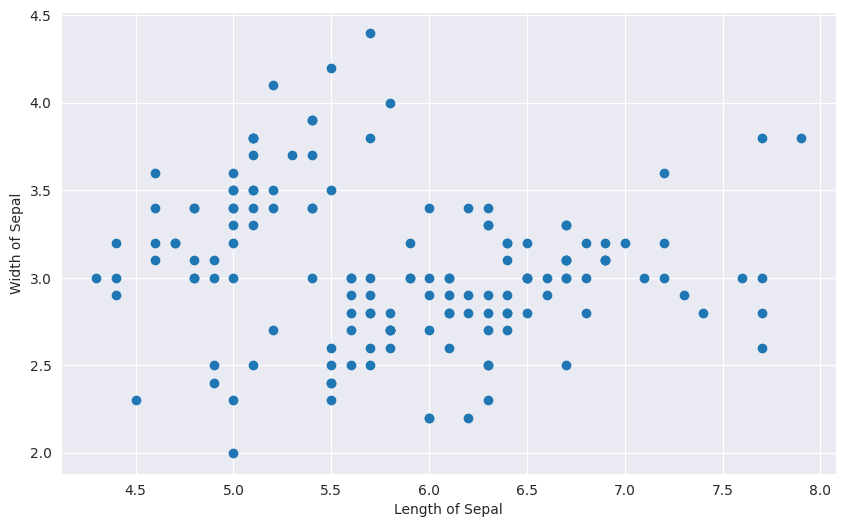

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(data=x,x='SepalLengthCm',y='SepalWidthCm')
plt.xlabel('Length of Sepal')
plt.ylabel('Width of Sepal');

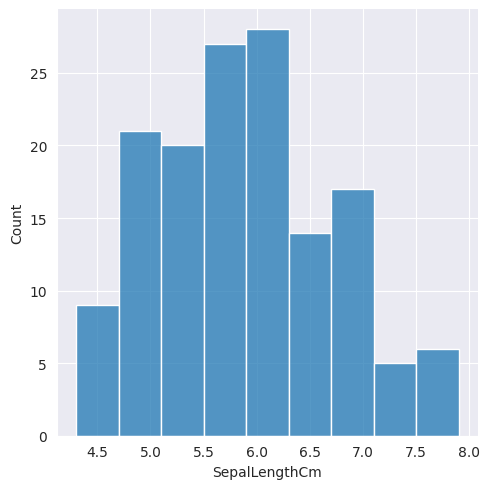

In [16]:
# Now, let's standardise variables
sns.displot(iris_data['SepalLengthCm']);


In [17]:
#Now that we standardised our variables let's scale the variables
x_scaled = preprocessing.scale(x)
x_scaled[:10]

array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001],
       [-0.55243423,  1.93841426, -1.18661318, -1.07090176],
       [-1.52063491,  0.79036069, -1.35773692, -1.20330089],
       [-1.03653457,  0.79036069, -1.30069567, -1.33570001],
       [-1.76268509, -0.35769288, -1.35773692, -1.33570001],
       [-1.15755966,  0.10152855, -1.30069567, -1.46809914]])

**Finding the optimum number of clusters for k-means classification**

In [18]:
x = iris_data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = [] #Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

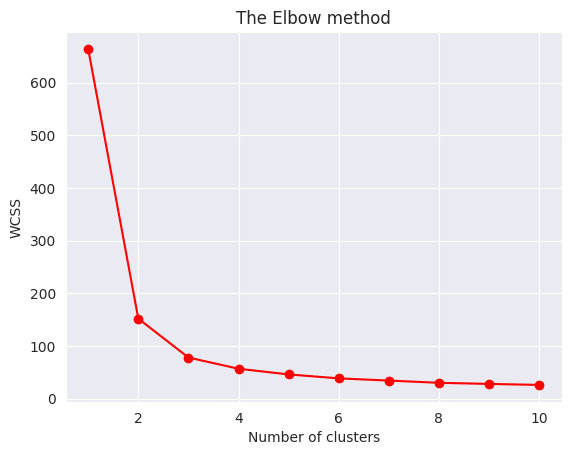

In [19]:
# Plotting the results by using Elbow graph
plt.plot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in wcss is minimal.
